# Vehicle Detection with Histogram of Gradients (HOG) 

## Loading libraries

In [1]:
# Import Libraries
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Image Preprocessing and loading dataset

In [2]:
# Image Preprocessing Function
def preprocess_image(img, size=(64, 64)):
    gray = rgb2gray(img)
    return resize(gray, size)

# Extract HOG Features
def extract_hog_features(image):
    features, _ = hog(image, 
                      orientations=9, 
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), 
                      block_norm='L2-Hys', 
                      visualize=True)
    return features

# base path to dataset
base_input_path = '/kaggle/input/vehicle-detection-image-set/data'

# full paths for vehicle and non-vehicle images
non_vehicle_path = os.path.join(base_input_path, 'non-vehicles')
vehicle_path = os.path.join(base_input_path, 'vehicles')

# Load Dataset and Extract Features
def load_data(vehicle_dir='vehicles', non_vehicle_dir='non-vehicles'):
    X = []
    y = []
    
    for label, folder in enumerate([non_vehicle_dir, vehicle_dir]):
        for filename in os.listdir(folder):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img = imread(os.path.join(folder, filename))
                img = preprocess_image(img)
                features = extract_hog_features(img)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

X, y = load_data(vehicle_dir=vehicle_path, non_vehicle_dir=non_vehicle_path)

## Training and Evaluate models

In [3]:
# Reduce dimensionality of HOG features
pca = PCA(n_components=80)  # Retain 95% variance
X_reduced = pca.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train and Evaluate KNN Classifier
print("🔷 KNN Results 🔷")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("-" * 50)


# Train and Evaluate SVM Classifier
print("🔶 SVM Results 🔶")
svm = SVC(kernel='rbf', random_state=42) # Using 'rbf' kernel
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("-" * 50)


# Step 8: Train and Evaluate Random Forest Classifier
print("🌳 Random Forest Results 🌳")
# n_estimators is the number of trees in the forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("-" * 50)

🔷 KNN Results 🔷
Accuracy: 0.9946509009009009
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1790
           1       1.00      0.99      0.99      1762

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552

--------------------------------------------------
🔶 SVM Results 🔶
Accuracy: 0.9943693693693694
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1790
           1       1.00      0.99      0.99      1762

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552

--------------------------------------------------
🌳 Random Forest Results 🌳
Accuracy: 0.9794481981981982
Classification Report:
               precision    

## Confusion Matrix

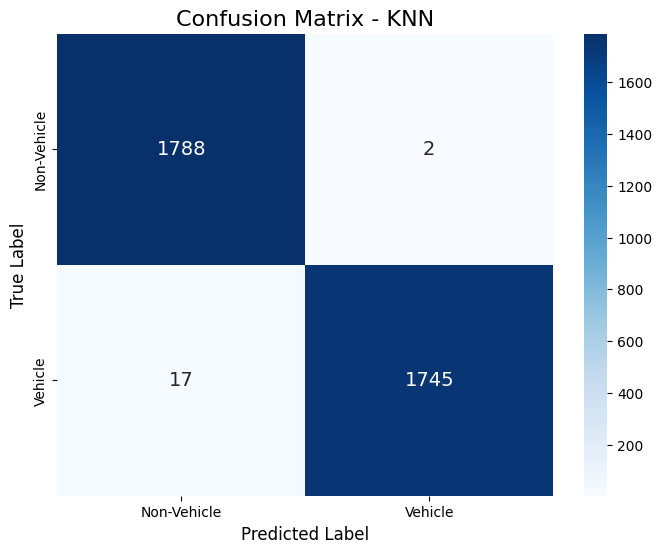

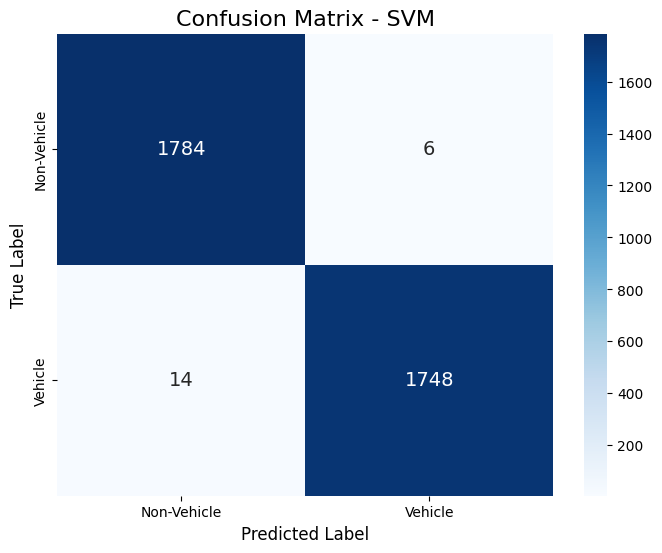

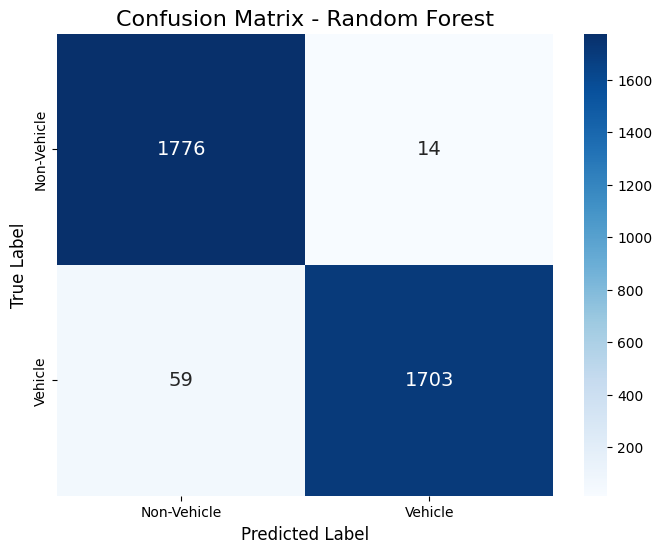

In [4]:
# Step 9: Confusion Matrices
def plot_confusion(cm, title, labels):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 14})
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

# Define class labels
class_labels = ["Non-Vehicle", "Vehicle"]

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion(cm_knn, "Confusion Matrix - KNN", class_labels)

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion(cm_svm, "Confusion Matrix - SVM", class_labels)

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion(cm_rf, "Confusion Matrix - Random Forest", class_labels)